> [Advent of Code](https://adventofcode.com/2022/about) is an Advent calendar of small programming puzzles for a variety of skill sets and skill levels that can be solved in any programming language you like. People use them as interview prep, company training, university coursework, practice problems, a speed contest, or to challenge each other.



In [1]:
import numpy as np, re, collections, matplotlib.pyplot as plt,functools,itertools,ast
from tqdm import tqdm

[Question 1](https://adventofcode.com/2022/day/1)

In [3]:
file = open("inputs/input1.txt","r")

totals = []
total = 0
for line in file.readlines():
    if line == "\n":
        totals.append(total)
        total = 0
    else:
        total += int(line[:-1])
print(f"Part A: {max(totals)}")
print(f"Part B: {sorted(totals)[-1] + sorted(totals)[-2] + sorted(totals)[-3]}")

Part A: 68467
Part B: 203420


[Question 2](https://adventofcode.com/2022/day/2)

In [4]:
file = open("inputs/input2.txt","r")

def scoreA(player1letter,player2letter):
    #1 is rock
    #2 is paper
    #3 is scissors
    player1dict = {'A':1,'B':2,'C':3}
    player2dict = {'X':1,'Y':2,'Z':3}        
    difference = (player1dict[player1letter] - player2dict[player2letter]) % 3
    #1 means p1 played paper and p2 played rock so p2 loses and gets 0
    differencescorces = {0:3,1:0,2:6}
    return player2dict[player2letter] + differencescorces[difference]
        
def scoreB(player1letter,player2letter):
    #1 is rock
    #2 is paper
    #3 is scissors
    player1dict = {'A':1,'B':2,'C':3}
    player2dict = {'X':(player1dict[player1letter]-2)%3 + 1,'Y':player1dict[player1letter],'Z':(player1dict[player1letter])%3 + 1}        
    difference = (player1dict[player1letter] - player2dict[player2letter]) % 3
    #1 means p1 played paper and p2 played rock so p2 loses and gets 0
    differencescorces = {0:3,1:0,2:6}
    return player2dict[player2letter] + differencescorces[difference]
        
test = ["A Y","B X","C Z"]
totalscoreB = 0
totalscoreA = 0
for line in file.readlines():
#     print(score(line[0],line[2]))
    totalscoreA += scoreA(line[0],line[2])
    totalscoreB += scoreB(line[0],line[2])
print(f"Part A: {totalscoreA}")
print(f"Part B: {totalscoreB}")

Part A: 13009
Part B: 10398


[Question 3](https://adventofcode.com/2022/day/3)

In [5]:
file = open("inputs/input3.txt","r")

def priority(letter):
    if letter.islower():
        return ord(letter)-96
    else:
        return ord(letter)-38
def findDupe(line):
    line1,line2=line[:int(len(line)/2)],line[int(len(line)/2):]
    # print(line1,line2)
    for letter in line1:
        if letter in line2:
            # print(priority(letter))
            return priority(letter)
    # print(line1,line2)
        
def findBadge(line1,line2,line3):
    for letter in line1:
        if letter in line2 and letter in line3:
            # print(letter)
            return priority(letter)
            
readLines = file.readlines()
readLines = [line[:-1] for line in readLines]
groups = int(len(readLines)/3)
resultA = sum([findDupe(line.split('\n')[0]) for line in readLines])
print(f"Part A: {resultA}")
print(f"Part B: {sum([findBadge(*readLines[3*i:3*i+3]) for i in range(groups)])}")

Part A: 7821
Part B: 2752


[Question 4](https://adventofcode.com/2022/day/4)

In [6]:
file = open("inputs/input4.txt")

# l = file.readlines()
# file = open("inputs/test4.txt")
# (a,b),(c,d) = list(map(lambda s: s.split("-"),l.split(",")))


#wat to check a -> c -> d -> b or c -> a -> b -> d
def checkContains(a,b,c,d):
    return (a <= c <= d <= b) or (c <= a <= b <= d)

#want to check a -> c -> b -> d or c -> a -> d -> b
def checkOverlaps(a,b,c,d):
    return (a <= d and c <= b)




totalA = 0
totalB = 0
for line in file.readlines():
    (a,b),(c,d) = list(map(lambda s: s.split("-"),line.split(",")))
    totalA += checkContains(int(a),int(b),int(c),int(d[:-1]))
    totalB += checkOverlaps(int(a),int(b),int(c),int(d[:-1]))
        
print(f"Part A: {totalA}")
print(f"Part B: {totalB}")

Part A: 542
Part B: 900


[Question 5](https://adventofcode.com/2022/day/5)

In [7]:
file = open("inputs/input5.txt")

readLines = file.readlines()
seperatorLine = readLines.index("\n")
boxesLines = readLines[:seperatorLine-1]
instructionLines = readLines[seperatorLine+1:]

instructionList = [[int(line.split(" ")[1]),\
                   int(line.split(" ")[3]),\
                   int(line.split(" ")[5][:-1])]\
                  for line in instructionLines]

matrixHeight = 100
boxesLines[0][-3+4*1]
boxMatrixA = np.empty((matrixHeight,9),str)
boxMatrixB = np.empty((matrixHeight,9),str)
for i,line in enumerate(boxesLines):
    for j in range(1,10):
        if line[-3+4*j] != ' ':
            boxMatrixA[-seperatorLine+1+i][j-1] = line[-3+4*j]
            boxMatrixB[-seperatorLine+1+i][j-1] = line[-3+4*j]
            
def findTop(matrix,column):
    i = 0
    while matrix[i%matrixHeight][column] == '' and i < matrixHeight:
        i+=1
    return i


def moveBoxA(matrix,num,start,end):
    topOfStart = findTop(matrix,start-1)
    topOfEnd = findTop(matrix,end-1)
    for i in range(num):
        matrix[(topOfEnd-num+(num-i-1))%matrixHeight][end-1] = matrix[(topOfStart+i)%matrixHeight][start-1] 
        matrix[(topOfStart+i)%matrixHeight][start-1] = ''
    # print(matrix[80:])
    return matrix

def moveBoxB(matrix,num,start,end):
    topOfStart = findTop(matrix,start-1)
    topOfEnd = findTop(matrix,end-1)
    for i in range(num):
        matrix[(topOfEnd-num+i)%matrixHeight][end-1] = matrix[(topOfStart+i)%matrixHeight][start-1] 
        matrix[(topOfStart+i)%matrixHeight][start-1] = ''
    return matrix
# boxMatrix
# print(boxMatrixA[90:])
for a,b,c in instructionList:
    boxMatrixA = moveBoxA(boxMatrixA,a,b,c)
    boxMatrixB = moveBoxB(boxMatrixB,a,b,c)



print(f"Part A: {''.join([boxMatrixA[findTop(boxMatrixA,i)%matrixHeight][i] for i in range(9)])}")
print(f"Part B: {''.join([boxMatrixB[findTop(boxMatrixB,i)%matrixHeight][i] for i in range(9)])}")
# boxMatrix

Part A: RNZLFZSJH
Part B: CNSFCGJSM


[Question 6](https://adventofcode.com/2022/day/6)

In [8]:
text = "hlfhfzffqnnrlnnvnmmgbgwgttbppcrcnnmdmfdmmgwwrrqnrrscrctcbttvcvtvvhchjhccjgjttmddplplqplqlbqlblrrbrvvprpffpmmzpmpcczjzzbwwfssvrrvggncgncgcwczzswwqqjjflffpwfpwpbwpwpdpbpvvqffcfcjffjllncczfzzmhzzmddgdrgrwwjzzdjjsnjsjfsjsjhhcchlccchqchhzzpnngdgndnpnppsdsggbvgvgpprqrqmmlzmzllvrrcvclcwczcqqcdcfcqqmmzbzdzdjzdjdmjdjzdjjcvjvcjvcvssltstttfbtftrfrlrdllrqqfssslccjdcjdjfdjfjqjnqjnjnrnddtnndtnnztzqztqztqzzpmzmggzrgrwwdqwdwcdwdnnmlmgmtmtstwssbffcnclclnclcjjcjpcpqcpqcpqpmqqfccpcjppnspsnnzggnpntndtdqtthwhnhwnwllzhlzhlzzghzghhlhvhwhjhfjjcnjnvjnjvvqccdmmgddllnmnrrdtdnncggfhgfglfgfmfnnpvvggznnwvnwwfgghrrfwrwzwszzzldzdldhlhblhblhbbbgjgsjggmqqmrrzggrhhwpwdpwdpwplpgpbggtssqffbqfbqbnnsqnqfnngcnnmwnmnbmmmslsjllbtbbpllltzzhgzztllsdllrvvhvjvbbhcbhchmchcctbcttvccgwcwpcchrcrdrdggcrrntrrfllcffbdfflrrrgbgrbbbdqbqjbbgbgrrqwqtwqwhwghwhzwwcswsnwnqqjhjhwhfwhffdfgddgjgsjgjhgglhlwhlhssfqfhhdmdnmnppdcddfzzhmhqqntqnnjvnjvjddcvcgcbgbbpjbjtbjjfgftgffplljfjrrhqqpddlssrvsrvrpppsllsdsqqqzzfttqsqzssjbbrnbnnrbbsrshsrrshrhwhbwbrrsrfrttfqtfqqfddvrvjrjvjsjhjsjdjqdjjlqjjjgcjcmcncfcrcwrwsrsslffzszmsszrsssrnrjjvbvpvcppptbbhhrddbcbggbqbmmsqqwggfpfbblmldmmpmwpwfwjfjsjnjmmpllccjzcjcwwpswshhpthhzchctcbcrrrrmvrvrdvvjmmvgmgwglghllvmllzlzzsvzzrmmhnnsjnnpvpwvpwwmvwwdqqdffhhhmccfgfvggchcctrrmdrrhrhnhnzzgpzzgttnhthvhzzqvvvwpwqpqdppsnnrgnnhphphmhcmcrmrvvqlvqqsccqhchzhwwmvmzmczzgsgdsggthgglrlnrlllbdllhwlwltwwcswsgssbhbsbvsbsbwbhbnncrcllttbrbppjccfpfhhgshschsccmrcmmcrrrzvvrcrggmwgwjwnwjjbffjddjnjgngqgdgnndznndvvfqfgfvvrvqrvvpllnsszbsbdbbdzbdbzbqbzznrznzjzpptcptccvwccfscffrftrrsnsvvswvvhbhzzfbzffncchhcnngzzcpcmmfttsntnjjsccqbcqqmzzgppdhppdtppmffgtgvvlzlpptdtttdppqjqtqctcrrzsswwtnwtnwnqqvbbdgjhvmmzpnhfvsbddzhgdwcnfdstvhhbzlzcfjwhlptbhmbmblprtsdmrdhbbbwpplnzgdnrzjmgzgpqbggnqvwwtntzgfwqrztqtdrsnhpfzswptggnvbszdcrmrhhtlrrfnpqrnpwrbmhlfwmdqqdbqrwbzqjbzwrgmbgrtzrhdclqfgsrtsgfwqrnnqgwsncmpgffggssrqvwjlhpsghbqdtzwmvzzvcmzsjqvprvcqwqjbcqcqrhpwwcsrscgmfdppbgvmnrdfrppblznbstnjzwwgstjvtprjbhtpdfgrhdjnjmnlbfwggzhcngvcwvcfpcwdtdppwjrdzsnjlnrzbfqqshlnzvwsmscgpfwjzhtwgfwgzdhbdwwzbsmfwwbmvrlrpswnjlmfbfzhwvcmgwfzssmmtjlwtrpwpwgnspbgchdncbfcpjsvtzjqtwqwjwgbhrbwvhqbcstsgsnwsjmhrlrvzgqhqfrmnrjdrhdjwcwctpdrzctlvnfzmzwhsnfprlzgzjpqvzchlmvbhffhpfjtvsdbvbdmwgvmqpflhwwndbqthmmwshdtspsrvqdflmmzwbqbqmpfdwjmvpbzdnqzfmhzdgldqjjvgpfcqftvjzwnzmfqdggrwlfzdhjnhmtrjbnllgqpntwmhnwtglnqdwbqdblpwnnrdwzpsqzfwqcmhqhnpsdcwvdldphgnrtqzdbnnzdzfttldrqcztlvlrgpdqzrcthslmtqhfvbzrfgnlrprcpbsctqhspbhnjtzrzhqjzszbzdthttqmbznzssftztwlggmdqqdtfllqjzjtvpgjfhtbwtbmtjplqnbdmsvlnqcwtdbdvfjnzgsmpnhbvvwwfbrgffjqfsccdjdwvbsdhqwfzvcpjzjbdjgrdctjplhwbdhhnbnwstvndnnwtsgbhzbvwdshvmnbwsthlrggtmddvjbfzfrnrdrqfjpslrccctzpjbwpdbhlbzfmwbltcqfngdprvfhgcszdtpnrcpdmllfnlspgrdrpwqmqbmrglvlrsmrfqrtzzgjcvqtqzpmghjrvmdmvvqztrjzbzjwdqsmrwpqnswbzhjbzzhdvmnfdsztzdzrjssgnnfqvbtsqrrmcppjgrmnstrnrlwjvvcczqlcbmwqzdfpssfwdfrvwtstwchdgwtrhhcmppcqlmrqlnwqccfphsdhbsbmtjvpcwwjrmrllbpnrmpbvwgwbftpdpphccwqcblcnvvbbppscmnjqgddllbnbvmmqzdffrrjtqwllzgpqrmnlfqrptzqmdmnrfnjpvqvjbsqrhljslgqqcqqtmtbwjrpphtjgjbqpzmzrzjrfjwcdcnbsjfljclffjplnrrcfbmhphtcjrzlrvvjcznpgpnrdwwqvgnbnzqnlcghhgwvhqbvjzfbdvhrzlqfbtlqhpltfjlfpbnjbphmmpntzqgjmwjtchwmlwvfjmfflqzpqnvvrgnbddzlfpdpdjghfgbsfddjspnfdwvqppncmdgfrnvrpcrflhgjgbwdsbwblfcwbtlrrnjjdhbvmrzgsvjwgfnnhqfbvhprlmwwqgclzlbqbrdspcbhftmdscsmpwrggrmnsvjphjmzmmrlrhnmdhwjlbmjchtvsrcplfspsssjznmzcrqnsjjtwjzvlhshbptqwwvjhjvzrhphphsbphpnzpfbwcdnqrhrrvlrwrztlpqnrcfzrncsvpzqzgslrlrwhvtgjmfncldqmvshlmnlpqbgvnwqfcthgrgllmqrjqmfgznspgltpptglpdcvhtzsprprbldbzhbmjsqzwvjggwhsczltcvgwqhspzpzvljwqjgrgtwswjdswlzjzslrsslvqzncjwhbbjpbdthqpgmhfglggmlrgwdsplgscrwstntvrhjzjjlshtgmnnhvsjwfmcjbpzjcstmnpvtbgrfcfdwjljsrfhdphrdcslwhgvlnwltwchplvfzntfgcnlsvzrvnnczhhqdlwjvqprhmtjdtwmppffmszzzqtfrgnhnzqgqzhrjzgntcszstrfhhtptgvswvzvjcgcntmhzzmdgsmtgzhpfvqfnwmsjdhtfgmmbrrfsdlptchqqzqdqjncmtpznfssrcnmcdnthglmfzsfgltrndqsfmdftmfgchbwmzgrtjvgqtshlltthnnpqnzfrchzhdzrrnpzvfzblrmhwdwjnqdptlbvndmmlhzhvsfdlmlhqrgqqzsdqtpczwcrwcbsftvvphfbwjrvrnrcqbbcsqgnhltwzvllljcvpwjgslbmngcdmpdvjlgcnrzwqjdgrblncpqmrgjmpqjzvdmcmwfnwqlszdgwqdfznhsnpsjrfwrqpqmpvhstmzgqblfmcfvwljbhdfhdmqcvrwnqcstwtzgmng"
# text = "bvwbjplbgvbhsrlpgdmjqwftvncz"

k = 0
while True:
    if len(set([text[k+j] for j in range(4)])) == 4:
        break
    k += 1

i = 0
while True:
    if len(set([text[i+j] for j in range(14)])) == 14:
        break
    i += 1
print(f"Part A: {k+4}")
print(f"Part B: {i+14}")

Part A: 1655
Part B: 2665


[Question 7](https://adventofcode.com/2022/day/7)

In [9]:
file = open("inputs/input7.txt","r")

class Folder:
    def __init__(self,name):
        self.name = name
        self.folders = []
        self.files = []
    def getSize(self):
        global filed,folderd
        return sum([folderd[f].getSize() for f in self.folders]) + sum([filed[f].size for f in self.files])
        
class File:
    def __init__(self,name,size):
        self.name = name
        self.size = int(size)  
    
lines = file.readlines()
lines
i = 0
global filed,folderd
folderd = {}
filed = {}
currentpath = ""
while i < len(lines):
    splitline = lines[i].split(" ")
    if splitline[0] == "$" and splitline[1] == "cd" and splitline[2][:-1] != "..":
        folderName = splitline[2][:-1]
        folderd[currentpath + folderName] = Folder(folderName)
        currentpath+=folderName + " "
        i+=2
        while i < len(lines) and lines[i][0] != "$":
#             print(lines[i][0])
            splitline = lines[i].split(" ")
            if splitline[0] == "dir":
#                 print(currentpath,splitline,folderd)
                folderd[currentpath.strip()].folders.append(currentpath+splitline[1][:-1])
            if splitline[0].isnumeric():
                folderd[currentpath.strip()].files.append(currentpath+splitline[1][:-1])
#                 if splitline[1][:-1] in filed.keys():
#                     print(splitline[1][:-1],"aaaaa")
                filed[currentpath+splitline[1][:-1]] = File(splitline[1][:-1],splitline[0])
            i+=1
    else:
        if splitline[0] == "$" and splitline[1] == "cd" and splitline[2][:-1] == "..":
            currentpath = " ".join(currentpath.strip().split(" ")[:-1]) + " "
        i+=1
        
total = 0
bigfolders = []
totaldisk = 70000000
needed = 30000000
extra = needed - (totaldisk - folderd["/"].getSize())

    
for name in folderd.keys():
#     print(name, folderd[name].getSize())
    if folderd[name].getSize() > extra:
        bigfolders.append(folderd[name].getSize())
    if folderd[name].getSize() < 100000:
        total+=folderd[name].getSize()
        
# print(folderd)
print(f"Part A: {total}")
print(f"Part B: {sorted(bigfolders)[0]}")
    
    

Part A: 1297683
Part B: 5756764


[Question 8](https://adventofcode.com/2022/day/8)

In [10]:
file = open("inputs/input8.txt","r")

readLines = file.readlines()
y,x = len(readLines),len(readLines[0])-1 
matrix = np.empty((y,x))
for i in range(x):
    for j in range(y):
        matrix[j][i] = int(readLines[j][i])

def checkVisible(matrix,i,j):
    if i == 0 or i == x-1 or j == 0 or j == y-1:
        return True
    if all([matrix[j][i] > matrix[j][i+p] for p in range(1,x-i)]):
        return True
    if all([matrix[j][i] > matrix[j][i-p] for p in range(1,i+1)]):
        return True
    if all([matrix[j][i] > matrix[j+q][i] for q in range(1,y-j)]):
        return True
    if all([matrix[j][i] > matrix[j-q][i] for q in range(1,j+1)]):
        return True
    return False

def scenicScore(matrix,i,j):
    if i == 0 or i == x-1 or j == 0 or j == y-1:
        return 0
    leftScore = 1
    rightScore = 1
    upScore = 1
    downScore = 1
    i0 = i
    j0 = j
    i = i0 + 1
    while i<x-1 and matrix[j0][i0] > matrix[j][i]:
        i += 1
        rightScore += 1
    i = i0-1
    while i>0 and matrix[j0][i0] > matrix[j][i]:
        i -= 1
        leftScore += 1
    i = i0
    j = j0 + 1
    while j<y-1 and matrix[j0][i0] > matrix[j][i]:
        j += 1
        downScore += 1
    j = j0-1
    while j>0 and matrix[j0][i0] > matrix[j][i]:
        j -= 1
        upScore += 1
    return leftScore*rightScore*upScore*downScore

print(f"Part A: {sum([checkVisible(matrix,i,j) for i in range(x) for j in range(y)])}")
print(f"Part B: {max([scenicScore(matrix,i,j) for i in range(x) for j in range(y)])}")

Part A: 1803
Part B: 268912


[Question 9](https://adventofcode.com/2022/day/9)

In [11]:
file = open("inputs/input9.txt")

size = 1000
global x,y,matrixA,matrixB
matrixA = np.empty((size,size),str)
matrixB = np.empty((size,size),str)
y = [int(size/2)]*10
x = [int(size/2)]*10

def movetails():
    for i in range(1,10):
        movetail(i)
#index = 0 is undefined since head is not connected to anythong
#index = 1 looks at the first joint, which is connected to the head (index = 0)
def movetail(index):
    global x,y,matrixA,matrixB
    while np.abs(x[index-1]-x[index])>1 or np.abs(y[index-1]-y[index])>1:
        xbigger = 1 if (x[index] > x[index-1]) else -1
        ybigger = 1 if (y[index] > y[index-1]) else -1
        xsame = (x[index]==x[index-1])
        ysame = (y[index]==y[index-1])
        if xsame:
            y[index] -= ybigger
        elif ysame:
            x[index] -= xbigger
        else:
            y[index] -= ybigger
            x[index] -= xbigger
        if index == 1:
            matrixA[y[1]][x[1]] = "#"
        if index == 9:
            matrixB[y[9]][x[9]] = "#"


matrixA[y[1]][x[1]] = "#"
matrixB[y[9]][x[9]] = "#"
for line in file.readlines():
    if line[0] == "L":
        for i in range(int(line.split(" ")[1])):
            x[0] -= 1
            movetails()
    if line[0] == "R":
        for i in range(int(line.split(" ")[1])):
            x[0] += 1
            movetails()
    if line[0] == "U":
        for i in range(int(line.split(" ")[1])):
            y[0] -= 1
            movetails()
    if line[0] == "D":
        for i in range(int(line.split(" ")[1])):
            y[0] += 1
            movetails()
    
#     print("head",x[index+1],y[index])
print(f"Part A: {sum([matrixA[j][i] == '#' for i in range(size) for j in range(size)])}")
print(f"Part A: {sum([matrixB[j][i] == '#' for i in range(size) for j in range(size)])}")
 

Part A: 6745
Part A: 2793


[Question 10](https://adventofcode.com/2022/day/10)

In [12]:
file = open("inputs/input10.txt","r")

instructionList = file.readlines()
global cycleCount,X,signalSum,outputLines
cycleCount = 0
X = 1
signalSum = 0
outputLines = [["."]*40,["."]*40,["."]*40,["."]*40,["."]*40,["."]*40]

def cycle():
    global cycleCount,X,signalSum,outputLines
    if np.abs(X-cycleCount%40)<=1:
#         print(X,[int(cycleCount/40),cycleCount%40])
#         print(outputLines[int(cycleCount/40)][cycleCount%40])
        outputLines[int(cycleCount/40)][cycleCount%40] = "#"
    cycleCount += 1
    if (cycleCount-20)%40 == 0:
#         print(X,cycleCount,X*cycleCount)
        signalSum += X*cycleCount    
#         return True
    return False
    
    
for line in instructionList:
    if line == "noop\n":
        print(line if cycle() else "",end = "")
    else:
        print(line if cycle() else "",end = "")        
        print(line if cycle() else "",end = "")
        num = int(line.split(" ")[1][:-1])
        X += num
#         print(X)
print(f"Part A: {signalSum}")
print("Part B:")
for line in outputLines:
    print("".join(line))

Part A: 15360
Part B:
###..#..#.#....#..#...##..##..####..##..
#..#.#..#.#....#..#....#.#..#....#.#..#.
#..#.####.#....####....#.#......#..#..#.
###..#..#.#....#..#....#.#.##..#...####.
#....#..#.#....#..#.#..#.#..#.#....#..#.
#....#..#.####.#..#..##...###.####.#..#.


[Question 11](https://adventofcode.com/2022/day/11)

In [13]:
file = open("inputs/input12.txt","r")

class Monkey:
    def __init__(self,lines):
        self.id = int(lines[0].split(" ")[1].split(":")[0])
        self.firstnum = lines[2].split(" ")[5]
        self.firstnum = int(self.firstnum) if self.firstnum != "old" else "old"
        self.secondnum = lines[2].split(" ")[7]
        self.secondnum = int(self.secondnum[:-1]) if self.secondnum[:-1] != "old" else "old"
        if lines[2].split(" ")[6] == "+":
            self.multiplying = False
        else:
            self.multiplying = True
        self.divisor = int(lines[3].split(" ")[5][:-1])
        self.trueMonkey = int(lines[4].split(" ")[-1][:-1])
        self.falseMonkey = int(lines[5].split(" ")[-1][:-1])
        self.inspected = 0

    def addItems(self,lines,large = True):
        if large:
            self.items = [BigNum(int(i)) for i in lines[1].split(":")[1].split(",")]
        else:
            self.items = [int(i) for i in lines[1].split(":")[1].split(",")]
        
    def add(self,num):
        if self.secondnum == "old" and self.firstnum == "old":
            return num + num
        elif self.firstnum == "old":
            return num + self.secondnum
        elif self.secondnum == "old":
            return self.firstnum + num
        else:
            return self.firstnum + self.secondnum
        
    def multiply(self,num):
        if self.secondnum == "old" and self.firstnum == "old":
            return num * num
        elif self.firstnum == "old":
            return num * self.secondnum
        elif self.secondnum == "old":
            return self.firstnum * num
        else:
            return self.firstnum * self.secondnum      
    
    def doTurn(self,monkeys,divide = False):
        #self.items = sorted(self.items,reverse=True)
        for i in range(len(self.items)):
            self.inspected += 1
            num = self.items[i]
            if not divide:
                if self.multiplying:
    #                 print(num)
                    num = self.multiply(num)
    #                 print(num)
                else:
                    num = self.add(num)
                if num.mods[self.divisor] == 0:
                        monkeys[self.trueMonkey].items.append(num)
                else:
                    monkeys[self.falseMonkey].items.append(num)

            else:
                if self.multiplying:
                    num = self.multiply(num)
                else:
                    num = self.add(num)
                    # print(num,[monkey.items for monkey in monkeys])
                num = int(num/3)
                if num % self.divisor == 0:
                    monkeys[self.trueMonkey].items.append(num)
                else:
                    monkeys[self.falseMonkey].items.append(num)
        self.items = []
        

class BigNum:
    def __init__(self,num):
        global divisors
        self.mods = {}
        for d in divisors:
            self.mods[d] = num%d
    def __mul__(self,num):
        if type(num) == int:
            for d in self.mods.keys():
                self.mods[d] = (self.mods[d]*num)%d
        elif type(num) == BigNum:
            for d in self.mods.keys():
                self.mods[d] = (self.mods[d]*num.mods[d])%d
        else:
            print("how?",num)
        return self
            
    def __add__(self,num):
        if type(num) == int:
            for d in self.mods.keys():
                self.mods[d] = (self.mods[d]+num)%d
        elif type(num) == BigNum:
            for d in self.mods.keys():
                self.mods[d] = (self.mods[d]+num.mods[d])%d
        else:
            print("how?",num,type(num))
        return self
    def __str__(self):
        return str(self.mods[max(self.mods.keys())])
        
    __rmul__ = __mul__
        
        
        
global monkeysA,monkeysB,divisors,numMonkeys

lines = file.readlines()
numMonkeys = int((len(lines)+1)/7)
monkeysA = [Monkey(lines[0+i*7:6+i*7]) for i in range(numMonkeys)]
monkeysB = [Monkey(lines[0+i*7:6+i*7]) for i in range(numMonkeys)]
divisors = [monkeysA[i].divisor for i in range(numMonkeys)]
for i in range(numMonkeys):
    monkeysA[i].addItems(lines[0+i*7:6+i*7],large=False)
    monkeysB[i].addItems(lines[0+i*7:6+i*7])

for turn in range(20):
    olditemsA = [monkey.items for monkey in monkeysA]
    for monkey in monkeysA:
        monkey.doTurn(monkeysA,True)

bidness = sorted([monkeysA[i].inspected for i in range(numMonkeys)])
print(f"Part A: {bidness[-1]*bidness[-2]}")

for turn in range(10000):
    olditemsB = [monkey.items for monkey in monkeysB]
    for monkey in monkeysB:
        monkey.doTurn(monkeysB)

bidness = sorted([monkeysB[i].inspected for i in range(numMonkeys)])
print(f"Part B: {bidness[-1]*bidness[-2]}")


IndexError: list index out of range

[Question 12](https://adventofcode.com/2022/day/12)

Part A: 517
Part B: 512


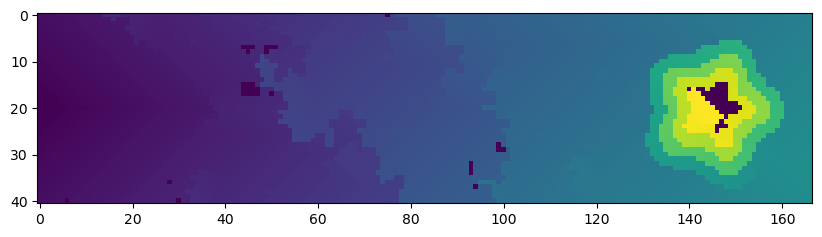

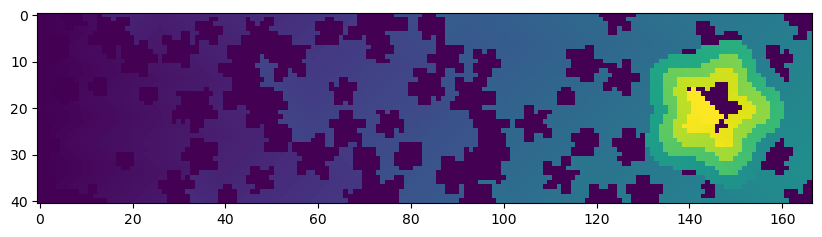

In [ ]:
file = open("inputs/input12.txt","r")

lines = file.readlines()
y,x = len(lines),len(lines[0])-1 
# markedmatrix = np.zeros((y,x))
matrix = np.empty((y,x),str)
newestpositionsA = []
newestpositionsB = []
for i in range(x):
    for j in range(y):
        matrix[j][i] = lines[j][i]
        if matrix[j][i] == "S":
            newestpositionsA.append((j,i))
        if matrix[j][i] == "a":
            newestpositionsB.append((j,i))
        if matrix[j][i] == "E":
            endpos = (j,i)
# print(newestpositionsA,newestpositionsB)
            
def canmove(start,end,markedmatrix):
    #if we have smacked into a wall
    if end[0] < 0 or end[1] < 0 or end[0] > y-1 or end[1] > x-1:
#         print(end)
        return False
    #if we already saw this tile
    if markedmatrix[end] != 0:
        return False
    if end == endpos:
        return matrix[start] == "z" or matrix[start] == "y"
    if matrix[start] == "S" or matrix[start] == "a":
        return matrix[end] == "a" or matrix[end] == "b" or matrix[end] == "S"
    #can always move to a, and end can be of a higher order, but only by one value comapred to start
    if ord(matrix[end]) - ord(matrix[start]) <= 1:
        return True
            
def findEnd(newestpositions,markedmatrix):
    iteration = 0
    # markedmatrix = np.zeros((y,x))
    # newestpositions = [startpos]
    while endpos not in newestpositions and iteration < 550:
        # if iteration < 5: print(newestpositions)
        positions = newestpositions.copy()
        newestpositions = []
        for pos in positions:
            for newpos in [(pos[0]-1,pos[1]),(pos[0]+1,pos[1]),(pos[0],pos[1]-1),(pos[0],pos[1]+1)]:
                # if iteration < 5: print(canmove(pos,newpos,markedmatrix))
                if canmove(pos,newpos,markedmatrix):
                    markedmatrix[newpos] = iteration+1
                    newestpositions.append(newpos)
        iteration+=1
    plt.figure(figsize=(10,10))
    plt.imshow(markedmatrix, interpolation='nearest')
    return iteration
                
print(f"Part A: {findEnd(newestpositionsA,np.zeros((y,x)))}")
print(f"Part B: {findEnd(newestpositionsB,np.zeros((y,x)))}")


[Question 13](https://adventofcode.com/2022/day/13)

In [ ]:
file = open("inputs/input13.txt")

class Packet:
    def __init__(self,data):
        self.data = data
    def __lt__(self,packet):
        if type(self.data)==int and type(packet.data)==int:
#             print("comparing",self.data,"and",packet.data)
            if self.data == packet.data:
                return "same"
            else:
                return self.data < packet.data
        elif type(self.data)==list and type(packet.data)==list:
#             print("comparing",self.data,"and",packet.data)
            if self.data==packet.data:
                return "same"
            i = 0
            while i < len(self.data) and i < len(packet.data):
                newcomparison = Packet(self.data[i])<Packet(packet.data[i])
                if newcomparison != "same":
                    return newcomparison
                i+=1
            return len(self.data)<len(packet.data)
            
        elif type(self.data)==int and type(packet.data)==list:
            return Packet([self.data])<packet
        elif type(self.data)==list and type(packet.data)==int:
            return self<Packet([packet.data])
    
    def __eq__(self,packet):
        return self.data == packet.data
    def __le__(self,packet):
        return self < packet or self == packet
    
lines = file.readlines()
entries = int((len(lines)+1)/3)

truelist = [Packet(ast.literal_eval(lines[0+3*i][:-1]))<Packet(ast.literal_eval(lines[1+3*i][:-1])) for i in range(entries)]  
print(f"Part A: {sum([i+1 if truelist[i] else 0 for i in range(entries)])}")
d1 = Packet([[2]])
d2 = Packet([[6]])
packetList = [d1]+[d2] + [Packet(ast.literal_eval(lines[0+3*i][:-1])) for i in range(entries)] + [Packet(ast.literal_eval(lines[1+3*i][:-1])) for i in range(entries)]       
sortedPacketList = sorted(packetList)
# print([packet.data for packet in sorted(packetList)])
print(f"Part B: {(sortedPacketList.index(d1)+1)*(sortedPacketList.index(d2)+1)}")

Part A: 5684
Part B: 22932


[Question 14](https://adventofcode.com/2022/day/14)

Part A: 994
Part B: 26283


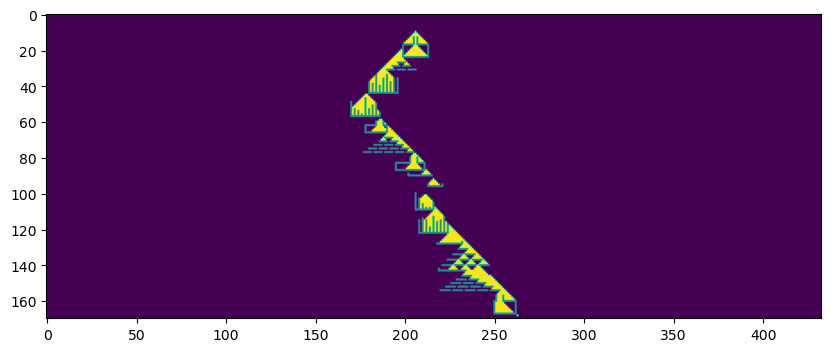

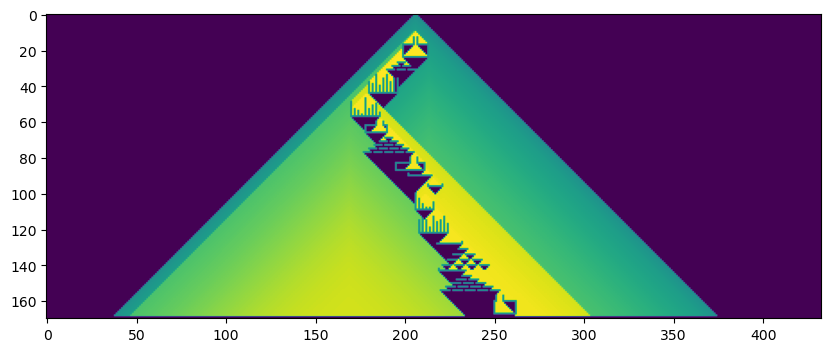

In [14]:
file = open("inputs/input14.txt","r")

np.set_printoptions(threshold=80)
readLines = file.readlines()
xs = [int(text[-3:]) for text in " ".join(readLines).split(",")[:-1]]
ys = [int(text.split(" ")[0]) for text in " ".join(readLines).split(",")[1:]]
global maxy,nummatrix
maxy = max(ys) + 2
offset = min(xs) -1- maxy
width = max(xs)-offset+maxy+2
partADone = False
# matrix = np.zeros((maxy+1,width),str)

nummatrix = np.zeros((maxy+1,width),int)
# np.set_printoptions(linewidth=200)
for i in range(width): 
    nummatrix[-1][i] = 1 

nummatrix[0][500-offset] = 3
        
for line in readLines:
    coords = [l.split(",") for l in line[:-1].split(" -> ")]
#     print(coords)
    for i in range(len(coords)-1):
        x1,y1 = list(map(int,coords[i]))
        x2,y2 = list(map(int,coords[i+1]))
        comparex = (x1 > x2) - (x1 < x2)
        comparey = (y1 > y2) - (y1 < y2)
#         print(coords[i],coords[i+1],comparex,comparey)
        while comparex != 0 or comparey != 0:
            comparex = (x1 > x2) - (x1 < x2)
            comparey = (y1 > y2) - (y1 < y2)
#             print(x1,x2,comparex)
#             matrix[y1][x1-offset] = '#'
            nummatrix[y1][x1-offset] = 400
            if comparex != 0 and comparey != 0:
                print("not a straight line?",coords[i],coords[i+1])
            elif comparey != 0:
                y1 -= comparey
            elif comparex != 0:
                x1 -= comparex


class Sand:
    def __init__(self):
        self.x = 500-offset
        self.y = 0
        
    def canMove(self):
        global nummatrix,maxy
        if self.y == maxy:
            return False
#         print(self.y,self.x)
        return nummatrix[self.y+1][self.x] == 0 or nummatrix[self.y+1][self.x-1] == 0 or nummatrix[self.y+1][self.x+1] == 0 
    
    def move(self):
        global nummatrix
        if nummatrix[self.y+1][self.x] == 0:
            self.y+=1
        elif nummatrix[self.y+1][self.x-1] == 0:
            self.y+=1
            self.x-=1
        elif nummatrix[self.y+1][self.x+1] == 0:
            self.y+=1
            self.x+=1
        return
    
    def infinite(self):
        global maxy
        return self.y==maxy-1
    def atHome(self):
        return self.x == 500-offset and self.y == 0
    
newSand = Sand()
newSand.move()
sandCollected = 0
while not newSand.atHome():
    newSand = Sand()
    while newSand.canMove():
        newSand.move()
    nummatrix[newSand.y][newSand.x] = 800 - 400*sandCollected/26283
    if not partADone and newSand.infinite():
        print(f"Part A: {sandCollected}")
        plt.figure(figsize=(10,10))
        plt.imshow(nummatrix)
        partADone = True
    sandCollected += 1


plt.figure(figsize=(10,10))
plt.imshow(nummatrix)
print(f"Part B: {sandCollected}")


    

[Question 15](https://adventofcode.com/2022/day/15)

In [15]:
#Goal: find a solution that works when we're not working with numbers in the hundreds of 
#thousands, and extract all the juicy maths that makes it work.
lines = open("inputs/input15.txt","r").readlines()
lines

distance = lambda x1,x2,y1,y2: np.abs(x1-x2) + np.abs(y1-y2)

ranges = []
ignorexs = []
uprightcs = []
downrightcs = []
upleftcs = []
downleftcs = []

for line in lines:
    split1 = line[:-1].split("=")
    numlist = []
    for smallLine in split1[1:]:
        i = 0
        digit = ""
        while i < len(smallLine) and (smallLine[i] == "-" or smallLine[i].isnumeric()):
            digit += smallLine[i]
            i+= 1
        numlist.append(int(digit))
    x1,y1,x2,y2 = numlist  
    y = 2000000
    if y1 == y and x1 not in ignorexs:
        ignorexs += [x1]
    if y2 == y and x2 not in ignorexs:
        ignorexs += [x2]
    d = distance(x1,x2,y1,y2)
    upleftcs += [x1-d-y1]
    uprightcs += [x1+d+y1]
    downleftcs += [x1-d+y1]
    downrightcs += [x1+d-y1]
    
    
    if np.abs(y1 - y) <= d:
        ranges.append([x1 - (d - np.abs(y1 - y)),x1 + (d - np.abs(y1 - y))])

mergedRanges = []
for start,end in sorted(ranges):
#     print(mergedRanges,start,end)
    if mergedRanges and start-mergedRanges[-1][1] < 2:
        if end > mergedRanges[-1][1]:
            mergedRanges[-1][1] = end
    else:
        mergedRanges += [[start,end]]

total = 0
for rangePart in mergedRanges:
    toIgnore = 0
    for x in ignorexs:
        if x >= rangePart[0] and x <= rangePart[1]:
            toIgnore += 1
    total += (rangePart[1]-rangePart[0]+1)-toIgnore
        
    #these equations were entered into desmos so I could comprehend what I was reading
    #|x1-x| + |y1 - 10| <= |x1-x2| + |y1-y2|
    #d = |x1-x2| + |y1-y2|
    #|x1-x| = d - |y1-10| 
    #x = x1 + |d - |y1-10||, x = x1 - |d - |y1-10||
    

list1 = sorted(downleftcs+uprightcs)
list2 = sorted(upleftcs+downrightcs)

xplusy = [list1[i] + 1 for i in range(len(list1)-1) if list1[i+1]-list1[i] == 2][0]
xminusy = [list2[i] + 1 for i in range(len(list2)-1) if list2[i+1]-list2[i] == 2][0]

y = (xplusy-xminusy)/2
x = (xplusy+xminusy)/2
# print(x,x<4000000,y,y<4000000)
mergedRanges
# xminusy
# ranges
print(f"Part A: {total}")
print(f"Part B: {int(4000000*x + y)}")

Part A: 5525990
Part B: 11756174628223


[Question 16](https://adventofcode.com/2022/day/16)

Things we've learned today:

- collections.defaultdict(lambda: value) works like java's HashMap.getOrDefault, where in this case the default is defined at initialisation.


- regexes are scary but can be used extremely effectively (along with re.findall) for questions like these (basically every advent calander question from now on).


- 1-line ifs and fors do exist in Python after all.


- For questions involving dynamic programming (many recursion questions), annotating functions with @functools.cache can save signifcant amounts of time.


- vectorising code (and using functions like max and min instead of excessive if statements) is actually necessary a lot of the time for extra performance.


- the floyd-warshall method is actually very cool :)


- forzensets, they are sets that are hashable (immutable).


- the inputs of a function with the cache annotation MUST be hashable (immutable).


- set difference is trivial, do it all the time please for search algorithms


- instead of that triple for loop we could have used "k,i,j in itertools.product(valves,valves,valves)"

In [16]:
file = open('inputs/input16.txt')

# this answer took heavy inspiration from u/4HbQ: 
# https://www.reddit.com/r/adventofcode/comments/zn6k1l/comment/j0fti6c/

r = r'Valve (\w+) .*=(\d*); .* valves? (.*)'

valves = set()
rates = dict()
distances = collections.defaultdict(lambda: 10000)

for valve,rate,connections in re.findall(r, file.read()):
    valves.add(valve)
    if rate != "0": rates[valve] = int(rate)
    for connection in connections.split(", "):  distances[valve,connection] = 1

# print(rates)
for k in valves:                     # floyd-warshall
    for i in valves:
        for j in valves:
            newdist = distances[i,k] + distances[k,j]
            if newdist < distances[i,j]:
                distances[i,j] = newdist
                
nonZeroValves = frozenset(rates)
maxTime = 30

@functools.cache
def search(time,currentValve = "AA", valves = nonZeroValves, addAnElephant = False):
    return max([search(26,"AA",valves,False) if addAnElephant else 0] +\
               [\
                rates[nextValve] * (time-1-distances[currentValve,nextValve]) +\
                search((time-1-distances[currentValve,nextValve]),nextValve,valves-{nextValve},addAnElephant)\
                for nextValve in valves if distances[currentValve,nextValve] < time\
               ])
ansA = search(30,addAnElephant=False)
ansB = search(26,addAnElephant=True)
print(f"Part A: {ansA}")
print(f"Part B: {ansB}")

Part A: 1828
Part B: 2292


[Question 17](https://adventofcode.com/2022/day/17)

I am not proud of how much of a mass this code is. Please avert your gaze dear reader. Maybe look at the sand question again :)

Part A: 3159
Part B: 1566272189352


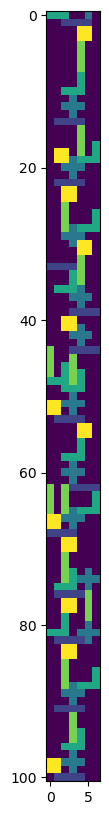

In [17]:
file = open("inputs/input17.txt","r")

def placeRock(matrix,pos,rock,value=1):
    tempmatrix = matrix.copy()

    for k in range(len(rock)):
        x = pos[1]
        y = pos[0] + k
        for letter in rock[k]:
            if letter == "#":
                if not (y >=0 and x >= 0 and x < 7) or tempmatrix[y][x] != 0: 
                    return matrix,False
                tempmatrix[y][x] = value
            x+=1
    return tempmatrix,True

def pushRock(matrix,pos,heigth,width,rock,fall = False):
    global pushes,jets,j,currentBottom
    othertempmatrix = matrix.copy()
    if fall:
        falldirection = -1
        direction = 0
    else:
        falldirection = 0
        direction = jets[pushes]
        pushes = (1+pushes)%len(jets)
    for k in range(len(rock)):
        x = pos[1]
        y = pos[0] + k
        for letter in rock[k]:
            if letter == "#":
                othertempmatrix[y][x] = 0
            x+=1
    newmatrix, bool =  placeRock(othertempmatrix,[pos[0] + falldirection ,pos[1] + direction],rock,j%5+1)
    return (newmatrix,[pos[0] + falldirection ,pos[1] + direction],bool) if bool else (matrix,pos,bool)


#j is the number of rocks that have fallen, n is the number of rocks we want to drop
def doTheRockThing(n,newpushes = 0,lookingForLoop = True):
    global j,currentBottom,matrix,firstBottom,firstJ,lastBottom,lastJ,startOfLoop,interestingPushNumbers,pushes
    pushes = newpushes
    startOfLoop = -1
    for j in range(n):
        if lookingForLoop:
            if j%5 == 0 and pushes == startOfLoop:
                lastBottom = currentBottom
                lastJ = j
                break
            if j%5 == 0 and startOfLoop == -1:
                if pushes in interestingPushNumbers:
                    startOfLoop = pushes
                    firstBottom = currentBottom
                    firstJ = j
                interestingPushNumbers.append(pushes)
        
        rockHeight = len(rocks[j%5])
        rockWidth = len(rocks[j%5][0])
        rockpos = (currentBottom+3,2)
        falling = True
        matrix,_ = placeRock(matrix,rockpos,rocks[j%5])
        while falling:
            matrix,rockpos,_ = pushRock(matrix,rockpos,rockWidth,rockHeight,rocks[j%5],fall=False)
            matrix,rockpos,falling = pushRock(matrix,rockpos,rockWidth,rockHeight,rocks[j%5],fall=True)
        while any(matrix[currentBottom] != [0]*7):
            currentBottom += 1

def resetVariables():
    matrix = np.zeros((15000,7)).astype(int)
    pushes = 0
    interestingPushNumbers = []
    currentBottom = 0
    return matrix,pushes,interestingPushNumbers,currentBottom

rocks = []
rockLines = [
    '####',
    '',
    '.#.',
    '###',
    '.#.',
    '',
    '###',
    '..#',
    '..#',
    '',
    '#',
    '#',
    '#',
    '#',
    '',
    '##',
    '##'
    ]
jets = [-1 if letter == "<" else 1 for letter in file.read()]
i = 0
while i < len(rockLines):
    thisRock = []
    while i < len(rockLines) and rockLines[i] != "":
        thisRock.append(rockLines[i])
        i+= 1
    rocks.append(thisRock)
    i+=1

global currentBottom,interestingPushNumbers
matrix,pushes,interestingPushNumbers,currentBottom = resetVariables()
doTheRockThing(2022,lookingForLoop=False)
print(f"Part A: {currentBottom}")
matrix,pushes,interestingPushNumbers,currentBottom = resetVariables()

doTheRockThing(9000,lookingForLoop=True)
plt.figure(figsize=(30,10))
plt.imshow(matrix[100::-1])
actualLastBottom = lastBottom
diff = lastJ-firstJ

loops = (1000000000000-firstJ)//diff
doTheRockThing(1000000000000 - (loops*diff +firstJ),newpushes=startOfLoop,lookingForLoop=False)
raiseByRemainder = (currentBottom - actualLastBottom)
print(f"Part B: {(currentBottom - actualLastBottom) + loops*(actualLastBottom-firstBottom) + firstBottom}")

[Question 18](https://adventofcode.com/2022/day/18)

In [18]:
file = open("inputs/input18.txt","r")

points = np.array([[int(x),int(y),int(z.split("\n")[0])] for x,y,z in [line.split(",") for line in file.readlines()]])
matrix = np.zeros((max(points[:,0])+2,max(points[:,1])+2,max(points[:,2])+2))
for x,y,z in points:
    matrix[x,y,z] = 1

#0: unmarked, no box and hasnt been covered in water
#1: box
#2: covered in water

matrix[0,0,0] = 2
newstarts = [[0,0,0]]
for depth in range(sum(matrix.shape)):
    starts = newstarts.copy()
    newstarts = []
    for start in starts:
        for newstart in [[max(start[0]-1,0),               start[1],                         start[2]],\
                        [min(start[0]+1,matrix.shape[0]-1),start[1],                         start[2]],\
                        [start[0],                         max(start[1]-1,0),                start[2]],\
                        [start[0],                         min(start[1]+1,matrix.shape[1]-1),start[2]],\
                        [start[0],                         start[1],                         max(start[2]-1,0)],\
                        [start[0],                         start[1],                         min(start[2]+1,matrix.shape[2]-1)]]:
            if matrix[newstart[0],newstart[1],newstart[2]] == 0:
                newstarts.append(newstart)
                matrix[newstart[0],newstart[1],newstart[2]] = 2

totalA = 0
totalB = 0
for x,y,z in points:
    for xdiff in [-1,1]:
        if matrix[x+xdiff,y,z] == 2:
            totalB += 1
            totalA += 1
        if matrix[x,y+xdiff,z] == 2:
            totalB += 1
            totalA += 1
        if matrix[x,y,z+xdiff] == 2:
            totalB += 1
            totalA += 1
        if matrix[x+xdiff,y,z] == 0:
            totalA += 1
        if matrix[x,y+xdiff,z] == 0:
            totalA += 1
        if matrix[x,y,z+xdiff] == 0:
            totalA += 1

print(f"Part A: {totalA}")
print(f"Part B: {totalB}")


Part A: 4242
Part B: 2428


[Question 19](https://adventofcode.com/2022/day/19)

In [19]:
file = open("inputs/input19.txt","r")

readfile = file.read()
global checked
checked = 0

def getGeodes(time,spec,resourcesAndBots,partB = False):
    time,oreOre,clayOre,obsOre,obsClay,geoOre,geoObs,ore,clay,obs,geo,oreBot,clayBot,obsBot,geoBot = time,*spec,*resourcesAndBots
    newstarts = [[ore,clay,obs,geo,oreBot,clayBot,obsBot,geoBot]]
    for t in range(time):
        starts = newstarts.copy()
        newstarts = []
        mostClayFound = 0
        mostObsFound = 0
        mostGeoFound = 0

        if partB:
            # while in part b, the total number of configurations at a given timestep is printed to the display to give an estimate of run time
            print(str(t)+":",len(starts),end =" ")
        for rb in starts:
            if any([all([rb[i] <= start[i] for i in range(8)]) for start in starts if rb != start]): 
                continue
            
            
            # print(rb)
            ore,clay,obs,geo,oreBot,clayBot,obsBot,geoBot = rb
            mostObsFound = max(obs,mostObsFound)
            if clay < mostClayFound - 3 and obsBot == 0:
                continue
            if obs < mostObsFound - 3 and geoBot == 0:
                continue
            if geo < mostGeoFound:
                continue


            canBuild = [oreOre <= ore,clayOre <= ore, obsOre <= ore and obsClay <= clay,geoOre <= ore and geoObs <= obs]
            ore += oreBot
            clay += clayBot
            obs += obsBot
            geo += geoBot
            if canBuild[3]:
                newstarts.append([ore-geoOre,clay,obs-geoObs,geo,oreBot,clayBot,obsBot,geoBot+1])
            else:
                newstarts.append([ore,clay,obs,geo,oreBot,clayBot,obsBot,geoBot])
                if canBuild[0] and (oreOre > oreBot or clayOre > oreBot or obsOre > oreBot or geoOre > oreBot) and ore - (time-t)*max(oreOre,clayOre,obsOre,geoOre) < 0:
                    # print("build ore") 
                    newstarts.append([ore-oreOre,clay,obs,geo,oreBot+1,clayBot,obsBot,geoBot])
                if canBuild[1] and (obsClay>clayBot) and clay - (time-t)*obsClay < 0: 
                    # print("build clay")
                    newstarts.append([ore-clayOre,clay,obs,geo,oreBot,clayBot+1,obsBot,geoBot])
                if canBuild[2] and (geoObs > obsBot) and obs - (time-t)*geoObs < 0: 
                    # print("build obs")
                    newstarts.append([ore-obsOre,clay-obsClay,obs,geo,oreBot,clayBot,obsBot+1,geoBot])
    return max([newstart[3] for newstart in newstarts])


regex = r"Blueprint (\d*): .* ore robot costs (\d*) ore\. .* clay robot costs (\d*) ore\. .* obsidian robot costs (\d*) ore and (\d*) clay. .* geode robot costs (\d*) ore and (\d*) obsidian."
scoreA = 0
scoreB = 1
print("ID:",end=" ")
for id,oreOre,clayOre,obsOre,obsClay,geoOre,geoObs in re.findall(regex,readfile):
    print(id,end = " ")
    scoreA += int(id)*getGeodes(24,[int(oreOre),int(clayOre),int(obsOre),int(obsClay),int(geoOre),int(geoObs)],[0,0,0,0,1,0,0,0])
print(f"\nPart A: {scoreA}")

for id,oreOre,clayOre,obsOre,obsClay,geoOre,geoObs in re.findall(regex,readfile)[:3]:
    print("\nID:",str(id)+", displaying number of configurations at each time step")
    scoreB *= getGeodes(32,[int(oreOre),int(clayOre),int(obsOre),int(obsClay),int(geoOre),int(geoObs)],[0,0,0,0,1,0,0,0],True)


print(f"\nPart B: {scoreB}")

ID: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 
Part A: 1081

ID: 1, displaying number of configurations at each time step
0: 1 1: 1 2: 1 3: 1 4: 1 5: 3 6: 5 7: 5 8: 7 9: 11 10: 14 11: 21 12: 34 13: 48 14: 55 15: 65 16: 64 17: 67 18: 70 19: 91 20: 96 21: 142 22: 238 23: 279 24: 385 25: 371 26: 535 27: 459 28: 562 29: 1166 30: 1663 31: 1556 
ID: 2, displaying number of configurations at each time step
0: 1 1: 1 2: 1 3: 1 4: 2 5: 4 6: 5 7: 7 8: 11 9: 16 10: 21 11: 34 12: 55 13: 62 14: 85 15: 95 16: 113 17: 145 18: 210 19: 299 20: 479 21: 671 22: 1002 23: 1435 24: 1833 25: 2477 26: 4402 27: 6932 28: 10011 29: 12705 30: 15192 31: 17845 
ID: 3, displaying number of configurations at each time step
0: 1 1: 1 2: 1 3: 1 4: 2 5: 4 6: 5 7: 7 8: 11 9: 16 10: 21 11: 34 12: 55 13: 62 14: 85 15: 95 16: 108 17: 140 18: 212 19: 311 20: 529 21: 740 22: 1019 23: 1452 24: 1743 25: 1859 26: 2365 27: 4142 28: 6751 29: 7877 30: 10219 31: 12317 
Part B: 2415


[Question 20](https://adventofcode.com/2022/day/20)

In [20]:
file = open("inputs/input20.txt","r")



readlines = file.readlines()
class Number:
    def __init__(self,pos,number):
        self.number = number
        self.currentpos = pos
global numsB,n
numsA = [Number(i,int(num.split("\n")[0])) for i,num in enumerate(readlines)]
numsB = [Number(i,811589153*int(num.split("\n")[0])) for i,num in enumerate(readlines)]
n = len(numsB)

def move(number,nums):
    global n
    i = number.currentpos
    j = (i + number.number)%(n-1)
    del nums[i]
    nums.insert(j,number)
    for p in range(min(i,j),max(i,j)+1):
        nums[p].currentpos = p


originalA = numsA.copy()
for num in tqdm(originalA):
    move(num,numsA)

originalB = numsB.copy()
for num in tqdm(originalB*10):
    move(num,numsB)

for num in originalA:
    if num.number == 0:
        zeroplaceA = num.currentpos
        break

for num in originalB:
    if num.number == 0:
        zeroplaceB = num.currentpos
        break

n = len(numsB)
print(f"Part A: {numsA[(zeroplaceA+1000)%n].number+numsA[(zeroplaceA+2000)%n].number+numsA[(zeroplaceA+3000)%n].number}")
print(f"Part B: {numsB[(zeroplaceB+1000)%n].number+numsB[(zeroplaceB+2000)%n].number+numsB[(zeroplaceB+3000)%n].number}")


100%|██████████| 50000/50000 [00:08<00:00, 6061.09it/s]

Part A: 14526
Part B: 9738258246847


[Question 21](https://adventofcode.com/2022/day/21)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
class code:
    def __init__(self,name,num = None,leftcode = None,operator = None,rightcode = None):
        self.name = name
        self.num = num
        self.left = leftcode
        self.right = rightcode
        self.operator = operator
        if self.name == "root":
            self.operatorB = "="

    def getNum(self,B=False):
        if self.num != None:
            return self.num
        
        else:
            global codes
            # print(codes[self.left].getNum(),self.operator, codes[self.right].getNum())
            if B:
                return (codes[self.left].getNum() - codes[self.right].getNum())
            if self.operator=="+":
                return codes[self.left].getNum() + codes[self.right].getNum()
            elif self.operator=="-":
                return codes[self.left].getNum() - codes[self.right].getNum()
            elif self.operator=="*":
                return codes[self.left].getNum() * codes[self.right].getNum()
            elif self.operator=="/":
                return codes[self.left].getNum() / codes[self.right].getNum()


        

lines = open("inputs/input21.txt","r").readlines()

#map from code string to code object
global codes
codes = {}

for line in lines:
    splitline = line.split("\n")[0].split(" ")
    if len(splitline) == 2:
        codes[splitline[0][:-1]] = code(splitline[0][:-1],int(splitline[1]))
        # print(splitline,codes[splitline[0][:-1]].getNum())
    elif len(splitline) == 4:
        codes[splitline[0][:-1]] = code(splitline[0][:-1],leftcode = splitline[1],operator=splitline[2],rightcode=splitline[3])

def f(i,codes):
    codes["humn"] = code("humn",i)
    return codes["root"].getNum(True)

print(f"Part A: {int(codes['root'].getNum())}")

#use a bisection method to find the value whivch gives f(a)=0
a = 10**0
b = 10**13
ans = f(a,codes)


while ans != 0:
    ans = f(int(a/2+b/2),codes)
    if ans*f(a,codes) < 0:
        b = int(a/2 + b/2)
    elif ans*f(b,codes) < 0:
        a = int(a/2 + b/2)
    # print(ans,f(a),f(b),int(a/2 + b/2))
print(f"Part B: {int(a/2 + b/2)}")


Part A: 51928383302238
Part B: 3305669217840


[Question 22](https://adventofcode.com/2022/day/22)

Part A: 103224
Part B: 189097


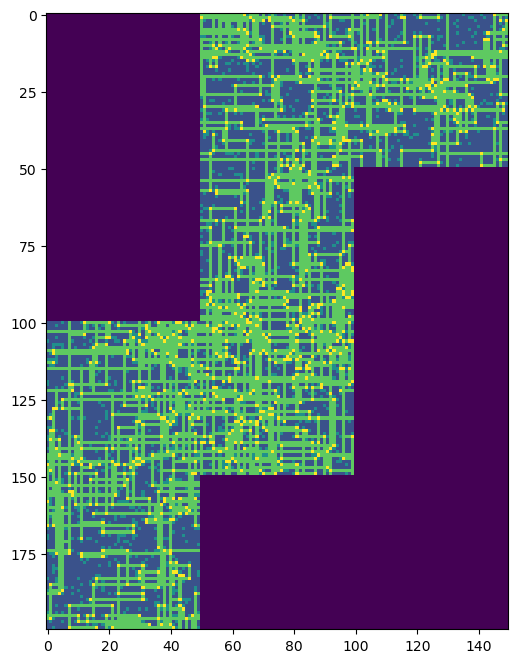

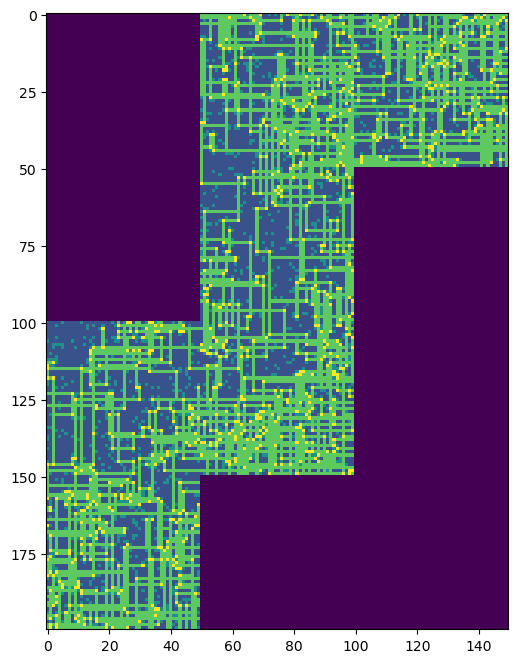

In [22]:
file = open("inputs/input22.txt","r")

lines = file.readlines()
sidelength = 50
width = max(len(line[:-1]) for line in lines[:-2])
height = len(lines)-2


instructions = lines[-1]

def moveA(pos,direction,number,p,matrix):
    y,x = pos
    direction1 = direction.copy()
    originalDirection = direction1.copy()
    for k in range(number):
        oldx,oldy,olddir = x,y,direction1
        while matrix[(y+direction1[0])%(height)][(x+direction1[1])%(width)] == 0:
            y = (y+direction1[0])%(height)
            x = (x+direction1[1])%(width)
        y = (y+direction1[0])%(height)
        x = (x+direction1[1])%(width)
        if matrix[y,x] != 2:
            matrix[y,x] = 3
        else:
            x,y,direction1 = oldx,oldy,olddir
    matrix[y,x] = 4
    return [y,x],direction1

def moveB(pos,direction,number,p,matrix):
    # global matrix
    y,x = pos
    direction1 = direction.copy()
    originalDirection = direction1.copy()
    for k in range(number):
        oldx,oldy,olddir = x,y,direction1
        if y+direction1[0] >= 0 and y+direction1[0] < 4*sidelength and x+direction1[1] >= 0 and x+direction1[1] < 3*sidelength and matrix[y+direction1[0]][x+direction1[1]] != 0:
            nextpos = [y+direction1[0],x+direction1[1]]
        else:
            if direction1 == [0,1]: #moving to the right
                if y < sidelength:
                    direction1 = [0,-1]
                    nextpos = [3*sidelength - (y+1),2*sidelength -1]
                elif y < 2*sidelength:
                    direction1 = [-1,0]
                    nextpos = [sidelength-1,sidelength + y]
                elif y < 3*sidelength: 
                    direction1 = [0,-1]
                    nextpos = [3 * sidelength - (y+1),3*sidelength - 1]
                else: 
                    direction1 = [-1,0]
                    nextpos = [3*sidelength - 1,y - 2*sidelength]
            elif direction1 == [0,-1]: #moving to the left
                if y < sidelength:
                    direction1 = [0,1]
                    nextpos = [3*sidelength - (y+1),0]
                elif y < 2*sidelength:
                    direction1 = [1,0]
                    nextpos = [2*sidelength,y-sidelength]
                elif y < 3*sidelength: 
                    direction1 = [0,1]
                    nextpos = [3*sidelength - (y+1),sidelength]                    
                else: 
                    direction1 = [1,0]
                    nextpos = [0,y-2*sidelength]
            elif direction == [1,0]: #moving down
                if x < sidelength:
                    nextpos = [0,x+2*sidelength]
                elif x < 2* sidelength:
                    direction1 = [0,-1]
                    nextpos = [x+2*sidelength,sidelength - 1]
                else:
                    direction1 = [0,-1]
                    nextpos = [x - sidelength,sidelength * 2 - 1]
            elif direction == [-1,0]: #moving up
                if x < sidelength:
                    direction1 = [0,1]
                    nextpos = [sidelength + x ,sidelength]
                elif x < 2*sidelength:
                    direction1 = [0,1]
                    nextpos = [2*sidelength+x,0]
                else:
                    nextpos = [4*sidelength-1,x-2*sidelength]
            # print("3:",nextpos)
        if matrix[nextpos[0],nextpos[1]] != 2:
            y,x = nextpos
            matrix[nextpos[0],nextpos[1]] = 3
        else:
            x,y,direction1 = oldx,oldy,olddir
    matrix[y,x] = 4
    return [y,x],direction1

def getScore(direction,pos,matrix,plot=True):
    if plot:
        plt.figure(figsize = (8,8))
        plt.imshow(matrix)
    if direction == [0,1]:
        dirscore = 0
    elif direction == [1,0]:
        dirscore = 1
    elif direction == [0,-1]:
        dirscore = 2
    elif direction == [-1,0]:
        dirscore = 3
    return 1000*(pos[0] + 1) + 4*(pos[1]+ 1) + dirscore

#do part A:
def doPart(name,moveFunc):
    matrix = np.zeros((height,width))
    for j,line in enumerate(lines):
        for i,letter in enumerate(line):
            if letter == ".":
                matrix[j,i] = 1
            elif letter == "#":
                matrix[j,i] = 2

    pos = [0,sidelength]
    direction = [0,1]
    matrix[pos[0]][pos[1]] = 3
    p = 0
    moves = 0
    while p < len(instructions):
        numberString = ""
        while instructions[p].isnumeric():
            numberString += instructions[p]
            p += 1
        number = int(numberString)

        pos,direction = moveFunc(pos,direction,number,p,matrix)
        moves += 1
        if instructions[p] == "L":
            direction = [-direction[1],direction[0]]
        elif instructions[p] == "R":
            direction = [direction[1],-direction[0]]
        p += 1

    print(f"Part {name}: {getScore(direction,pos,matrix)}")

doPart("A",moveA)
doPart("B",moveB)

[Question 23](https://adventofcode.com/2022/day/23)

Part A: 4172
Part B: 942


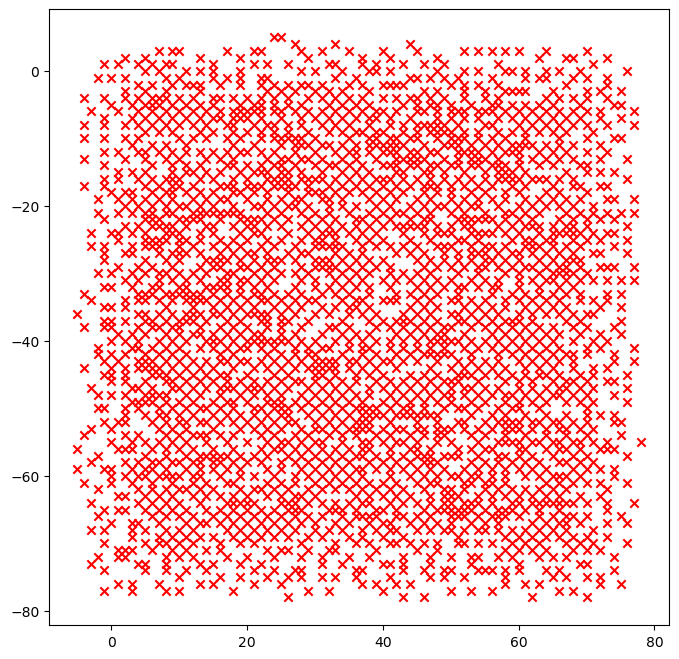

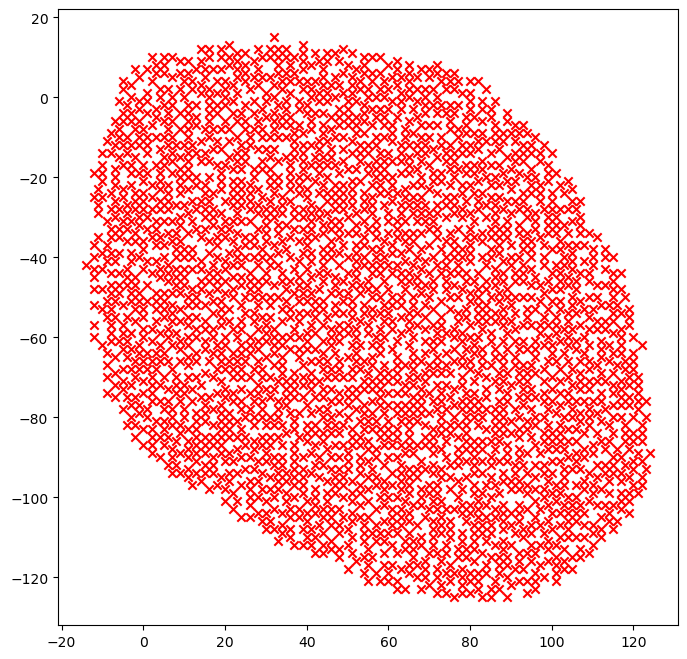

In [23]:
file = open("inputs/input23.txt")

class Elf:
    def __init__(self,position):
        self.pos = position
        self.nextpos = position

    def propose(self,num):
        if num == 1: #north = 1 , south = 2, west = 3, east = 4
            proposals[self.pos[0]-1,self.pos[1]] += 1
            self.nextpos = [self.pos[0]-1,self.pos[1]]
        elif num == 2:
            proposals[self.pos[0]+1,self.pos[1]] += 1
            self.nextpos = [self.pos[0]+1,self.pos[1]]
        elif num == 3:
            proposals[self.pos[0],self.pos[1]-1] += 1
            self.nextpos = [self.pos[0],self.pos[1]-1]
        elif num == 4:
            proposals[self.pos[0],self.pos[1]+1] += 1
            self.nextpos = [self.pos[0],self.pos[1]+1]

elves = []
positions = collections.defaultdict(lambda: 0)
lines = file.readlines()
for j in range(len(lines)):
    for i in range(len(lines[0].split("\n")[0])):
        if lines[j][i] == "#":
            elves.append(Elf([j,i]))
            positions[j,i] += 1
            # plt.scatter(i,-j,color="red")


#true means the space is occupied
# 0 1 2
# 3 . 4
# 5 6 7

def checknear(pos):
    y,x = pos
    directionList = [[y-1,x-1],[y-1,x],[y-1,x+1],[y,x-1],[y,x+1],[y+1,x-1],[y+1,x],[y+1,x+1]]
    directions = [positions[d[0],d[1]] for d in directionList]
    return [sum(directions) == 0,directions[0] + directions[1] + directions[2] == 0,directions[5] + directions[6] + directions[7] == 0,directions[0] + directions[3] + directions[5] == 0,directions[2] + directions[4] + directions[7] == 0]


elvesMoved = 1
turn = -1
while elvesMoved != 0:
    if turn == 10:
        xmax,ymax,xmin,ymin = max([x for y,x in positions]),max([y for y,x in positions]),min([x for y,x in positions]),min([y for y,x in positions])
        plt.figure(figsize=(8,8))
        plt.scatter([x for y,x in set(positions)],[-y for y,x in set(positions)],color = "red",marker = "x")
        print(f"Part A: {(xmax - xmin)*(ymax-ymin) - len(elves)}")
    turn += 1
    elvesMoved = 0
    proposals = collections.defaultdict(lambda: 0)
    for elf in elves:
        conds = checknear(elf.pos)
        if conds[0]:
            continue
        elif conds[1+(turn%4)]:
            elf.propose(1+(turn%4))
        elif conds[1+(1+turn)%4]:
            elf.propose(1+(1+turn)%4)
        elif conds[1+(2+turn)%4]:
            elf.propose(1+(2+turn)%4)
        elif conds[1+(3+turn)%4]:
            elf.propose(1+(3+turn)%4)
        else:
            pass
    positions = collections.defaultdict(lambda: False)
    # print(proposals)
    for elf in elves:
        if proposals[elf.nextpos[0],elf.nextpos[1]] == 1 and elf.pos != elf.nextpos:
            # print("shmooved from",elf.pos,"to",elf.nextpos)
            elf.pos = elf.nextpos
            elvesMoved += 1
        else:
            elf.nextpos = elf.pos
        positions[elf.pos[0],elf.pos[1]] = True
    # print(elvesMoved,end = " ")
    # plt.scatter([x for y,x in positions],[-y for y,x in positions],color = "red",marker = "x")

plt.figure(figsize=(8,8))
plt.scatter([x for y,x in set(positions)],[-y for y,x in set(positions)],color = "red",marker = "x")
print(f"Part B: {turn+1}")

[Question 24](https://adventofcode.com/2022/day/24)

Part A: 308
Part B: 908


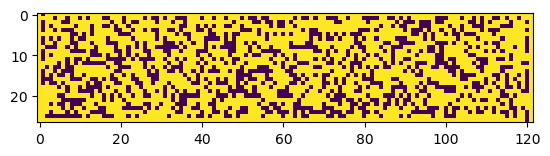

In [24]:
file = open("inputs/input24.txt")

lines = file.readlines()
x,y = len(lines[0][:-1]), len(lines)
turncount = np.lcm(x-2,y-2)
#COORDINATES: row (v), column (>), turns mod row, turns mod column
wallmatrix = np.zeros((y,x,turncount))

for i in range(0,y):
    for j in range(0,x):
        if lines[i][j] != ".":
            for turn in range(turncount):
                if lines[i][j] == ">":
                    wallmatrix[i,1+(j-1+turn)%(x-2),turn] = 1
                elif lines[i][j] == "<":
                    wallmatrix[i,1+(j-1-turn)%(x-2),turn] = 1
                elif lines[i][j] == "v":
                    wallmatrix[1+(i-1+turn)%(y-2),j,turn] = 1
                elif lines[i][j] == "^":
                    wallmatrix[1+(i-1-turn)%(y-2),j,turn] = 1
                else:
                    wallmatrix[i,j,turn] = 1


def breadthFirstSearch(endpos,newestpositions,turn,checkedmatrix,part=0):
    while endpos not in newestpositions and turn < x*y*turncount:
        turn += 1
        positions = newestpositions.copy()
        newestpositions = []
        for pos in positions:
            for newpos in [(pos[0]-1,pos[1]),(pos[0]+1,pos[1]),(pos[0],pos[1]-1),(pos[0],pos[1]+1),(pos[0],pos[1])]:
                if newpos[0] < y and newpos[1] < x and newpos[0] >=0 and newpos[1] >= 0: 
                    if checkedmatrix[newpos[0],newpos[1],turn%turncount] == 0 and wallmatrix[newpos[0],newpos[1],turn%turncount] == 0:
                        checkedmatrix[newpos[0],newpos[1],turn%turncount] = 1
                        newestpositions.append(newpos)
                        if newpos == endpos and part != 0:
                            print(f"Part {part}: {turn}")
    return turn


turn = 0
endpos = (y-1,x-2)
newestpositions = [(0,1)]
checkedmatrix = np.zeros((y,x,turncount))
turn = breadthFirstSearch(endpos,newestpositions,turn,checkedmatrix,part="A")

endpos = (0,1)
newestpositions = [(y-1,x-2)]
checkedmatrix = np.zeros((y,x,turncount))
turn = breadthFirstSearch(endpos,newestpositions,turn,checkedmatrix)


endpos = (y-1,x-2)
newestpositions = [(0,1)]
checkedmatrix = np.zeros((y,x,turncount))
breadthFirstSearch(endpos,newestpositions,turn,checkedmatrix,part = "B")


plt.imshow(wallmatrix[:,:,2]);

[Question 25](https://adventofcode.com/2022/day/25)

In [25]:
file = open("inputs/input25.txt")

#i had made a balanced base x class in the past, so base 5 is a simplificification of that
import numpy as np
class basex:
    def __init__(self,x,b10 = False, bx = False):
        self.x = x
        self.halfx = x // 2 
        if b10:
            self.b10 = b10
            self.bx = self.convertfrom10(b10)
        elif bx:
            self.bx = bx
            self.b10 = self.convertfromx(bx)
        else:
            self.b10 = 0
            self.bx = [0]
        self.length = len(self.bx)
        self.unit = self.bx[-1]
        
    def convertfromx(self,bx):
        return sum([num*self.x**index for index,num in enumerate(bx[::-1])])
    
    def convertfrom10(self,b10):
        num = b10
        bx = []
        modx = lambda y: (y%self.x - self.x) if ((y%self.x) > self.halfx) else (y%self.x)
        while num != 0:
            bx = [modx(num)] + bx
            num -= modx(num)
            num //= self.x
        return bx
    
    def __str__(self):
        string = ""
        for num in self.bx:
            if num == -2:
                string += "="
            elif num == -1:
                string += "-"
            elif num == 0:
                string += "0"
            elif num == 1:
                string += "1"
            elif num == 2:
                string += "2"
        return string
        
lines = file.readlines()

total = 0
for line in lines:
    list5 = []
    for letter in line.split("\n")[0]:
        if letter == "2":
            list5 += [2]
        elif letter == "1":
            list5 += [1]
        elif letter == "0":
            list5 += [0]
        elif letter == "-":
            list5 += [-1]
        elif letter == "=":
            list5 += [-2]
    total += basex(5,bx=list5).b10
print(f"Part A: {str(basex(5,b10=total))}")


Part A: 20=02=120-=-2110-0=1
